Question 1a) & 1b)

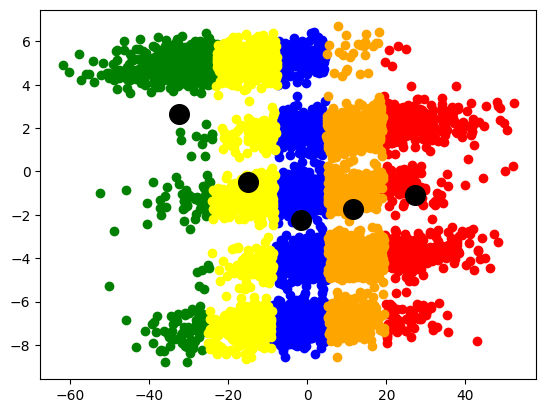

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# initialization
x1 = np.array([10.0, 10.0])
x2 = np.array([-10.0, -10.0])
x3 = np.array([2.0, 2.0])
x4 = np.array([3.0, 3.0])
x5 = np.array([-3, -3.0])
K = 5  # number of clusters
centroids = np.array([x1, x2, x3, x4, x5])  # initializing centroids

# loading data
data = np.loadtxt('f150_motor_distributors.txt',delimiter=',')

# k-means algorithm
for i in range(100):
    # assigning each point to the closest centroid
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    my_val = np.argmin(distances, axis=1)
    
    # updating the centroids
    for j in range(K):
        cluster_points = data[my_val == j]
        if len(cluster_points) > 0:
            centroids[j] = np.mean(cluster_points, axis=0)
    
    # convergence
    if i > 0 and np.all(my_val == prev_val):
        break
    
    prev_val = my_val.copy()
# ploting
colors = ['red', 'green','blue', 'orange', 'yellow']
for j in range(K):
    cluster_points = data[my_val == j]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[j])

# ploting the final centroids as black circle
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', color='black', s=200)
plt.show()


Question 1c):

The reason that it is logical to start with k=5 is because we are looking at 5 different years.

After checking the clusters, it's clear that the initialization didn't do a great job in grouping the data. The clusters are mixed up and it is hard to find which point belongs to which cluster. So, it looks like the centroids we used to initialize might not have been the best fit. We might also want to try using a different number of clusters to start to see if that helps.

Question 2a)

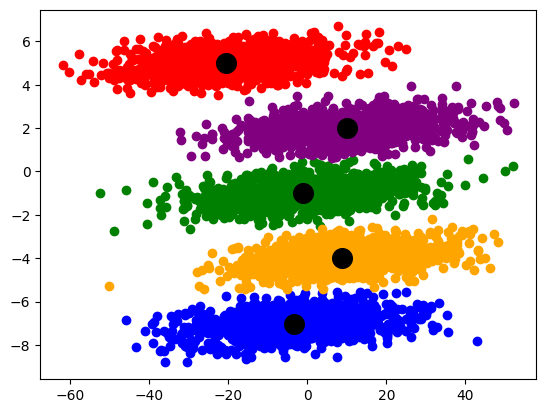

In [16]:
P = np.array([[10, 0.5], [-10, 0.25]])
k = len(clusters)
def mahalanobis(X, Y):
    dist = 0
    for i in range(len(P)):
        for j in range(len(P[0])):
            dist += (X[i] - Y[i]) * P[i,j] * (X[j] - Y[j])
    return dist
for i in range(100):
    # assigning each point to the closest centroid
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    my_val = np.argmin(distances, axis=1)
    
    # updating the centroids
    for j in range(K):
        cluster_points = data[my_val == j]
        if len(cluster_points) > 0:
            centroids[j] = np.mean(cluster_points, axis=0)
    
    # convergence
    if i > 0 and np.all(my_val == prev_val):
        break
    
    prev_val = my_val.copy()
# ploting
colors = ['red', 'green','blue', 'orange', 'yellow']
for j in range(K):
    cluster_points = data[my_val == j]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[j])

# ploting the final centroids as black circle
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', color='black', s=200)
plt.show()


Question 2b)

In [48]:
from sklearn.decomposition import PCA
PCAs = PCA(2)
PCA_agrregate = PCAs.fit(data)
print("Aggregate PCAs =:", PCA_agrregate.components_)
     

Aggregate PCAs =: [[-0.99838317  0.05684225]
 [-0.05684225 -0.99838317]]


Question 2c)

In [42]:
cluster_1 = clusters[0]
cluster_1_PCAs = PCAs.fit(cluster_1)
print("Principle Components of cluster 1:", cluster_1_PCAs.components_)

Principle Components of cluster 1: [[ 0.99993527  0.01137789]
 [ 0.01137789 -0.99993527]]


In [43]:
cluster_2 = clusters[1]
cluster_2_PCAs = PCAs.fit(cluster_2)
print("Principle Components of cluster 2:", cluster_2_PCAs.components_)

Principle Components of cluster 2: [[ 0.99992533  0.01222027]
 [ 0.01222027 -0.99992533]]


In [44]:
cluster_3 = clusters[2]
cluster_3_PCAs = PCAs.fit(cluster_3)
print("Principle Components of cluster 3:", cluster_3_PCAs.components_)

Principle Components of cluster 3: [[ 0.99990986  0.01342629]
 [ 0.01342629 -0.99990986]]


In [45]:
cluster_4 = clusters[3]
cluster_4_PCAs = PCAs.fit(cluster_4)
print("Principle Components of cluster 4:", cluster_4_PCAs.components_)

Principle Components of cluster 4: [[ 0.99993306  0.01157047]
 [-0.01157047  0.99993306]]


In [46]:
cluster_5 = clusters[4]
cluster_5_PCAs = PCAs.fit(cluster_5
print("Principle Components of cluster 5:", cluster_5_PCAs.components_)

Principle Components of cluster 5: [[-0.99989374 -0.01457781]
 [-0.01457781  0.99989374]]


Question 2d)

In [63]:
eig_values ,eig_vectors = np.linalg.eig(P.T)
p_prime = eig_values * eig_vectors
print("P prime=" ,p_prime)

P prime= [[9.44301625 0.58344264]
 [0.51282107 0.53717161]]


Basically, P' takes the original data and rotates it around to line up with the directions of data. Each column of P' is an arrow pointing in the direction of one of those main directions. The diagonal also tells you how much variance there is in each of those main directions.